In [ ]:
%matplotlib                    # Pyplot 그래프 새창에서 열기 옵션

In [ ]:
%matplotlib inline             # Pyplot 그래프 새창에서 열기 '취소' 옵션

In [3]:
pd.set_option('display.max_rows',    100)      # DataFrame 데이터 확인 시 최대 표시 행 수
pd.set_option('display.max_columns', 100)      # DataFrame 데이터 확인 시 최대 표시 열 수

## 라이브러리 import

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import time

t-SNE 라이브러리

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold      import TSNE

.

.

.



## 데이터 불러오기

특징값 데이터 불러와서 정상/고장 분리

In [4]:
FeatureData = pd.read_csv('./ProcessedData/FeatureData', header=None)
FeatureData.shape

(270, 360)

P value 순위 데이터 불러오기

In [5]:
P_value_Rank = pd.read_csv('./ProcessedData/P_value_Rank' , header=None)
P_value_Rank

,0,1
0,198.0,4.762393e-81
1,110.0,5.270311e-77
2,170.0,4.615377e-76
3,134.0,5.747675e-74
4,133.0,7.585991e-74
...,...,...
265,85.0,8.999631e-01
266,95.0,9.358453e-01
267,255.0,9.450087e-01
268,217.0,9.695416e-01


## P value 기준 차원축소 대상 데이터(Feature data) 선정

In [16]:
# StartRank 부터 Number 만큼의 Feature
StartRank = 1
Number    = 30

SelectedFeatues = np.zeros((Number,FeatureData.shape[1]))

s = 0

for i in range(StartRank, StartRank+Number):
    
    index                = int(P_value_Rank.iloc[i-1,0])
    SelectedFeatues[s,:] = FeatureData.iloc[index,:].values
    s += 1

# 정상, 고장 특징값 합치기    
FeatureSelected = pd.DataFrame(SelectedFeatues)
FeatureSelected.shape

(30, 360)

In [17]:
FeatureSelected = np.transpose(FeatureSelected)
FeatureSelected.shape

(360, 30)

.

.

.



# 차원축소(t-SNE) 기반 데이터 시각화

In [21]:
time_start   = time.time()
tsne         = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=5000, random_state=1) #perplexity 주변의 몇개의 점까지 할지
tsne_results = tsne.fit_transform(FeatureSelected)

print( '\n\n t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start )) #kl다이버젼스 에러라고 생각 낮추는 방향으로

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 360 samples in 0.001s...
[t-SNE] Computed neighbors for 360 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 360 / 360
[t-SNE] Mean sigma: 0.166310
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.966454
[t-SNE] KL divergence after 1750 iterations: 0.356286


 t-SNE done! Time elapsed: 6.605518341064453 seconds


In [22]:
pd.DataFrame(tsne_results)

,0,1
0,13.633306,11.421381
1,5.649989,26.106659
2,9.353817,17.066774
3,8.668865,20.937138
4,7.843908,14.125079
...,...,...
355,-0.814407,-15.607964
356,-10.681441,-24.073532
357,-15.529942,-15.629532
358,-1.603728,-3.701858


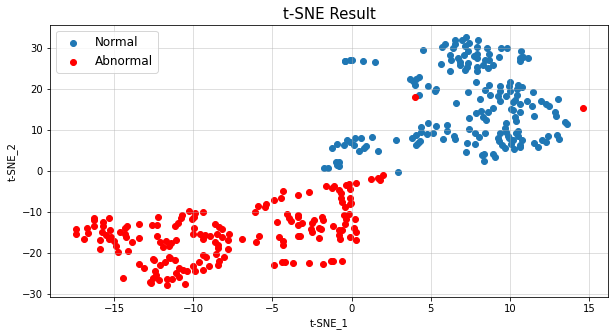

In [23]:
NoOfData = int(FeatureSelected.shape[0]/2)

plt.figure(figsize=(10,5))

plt.scatter(tsne_results[:NoOfData,0], tsne_results[:NoOfData,1], marker='o', label='Normal')
plt.scatter(tsne_results[NoOfData:,0], tsne_results[NoOfData:,1], marker='o', label='Abnormal', c='r')
plt.title('t-SNE Result', fontsize=15)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')

plt.show()